# Wine Classification Analysis

## Library Imports

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
sns.set_style('darkgrid')

## Data Import and Overview

In [111]:
df = pd.read_csv('./data/wine.csv')
# imports the csv file as a dataframe

In [151]:
df.tail(5)
# outputs last 5 rows of data

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,wine
6492,6.2,0.21,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,white
6493,6.6,0.32,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,white
6494,6.5,0.24,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,white
6495,5.5,0.29,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,white
6496,6.0,0.21,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,white


In [113]:
df.info()
# outputs information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [114]:

df.describe()
# outputs statistical summaries about each column

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [115]:
df.isna().sum()
# shows us the number of missing values in the dataset. 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red_wine                0
dtype: int64

In [116]:
df.dtypes
# tells us the data type of each column

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
red_wine                  int64
dtype: object

We can see in the above overview of the dataset, we are not missing any data, nor are any of the columns the wrong datatype. 

## Data Cleaning

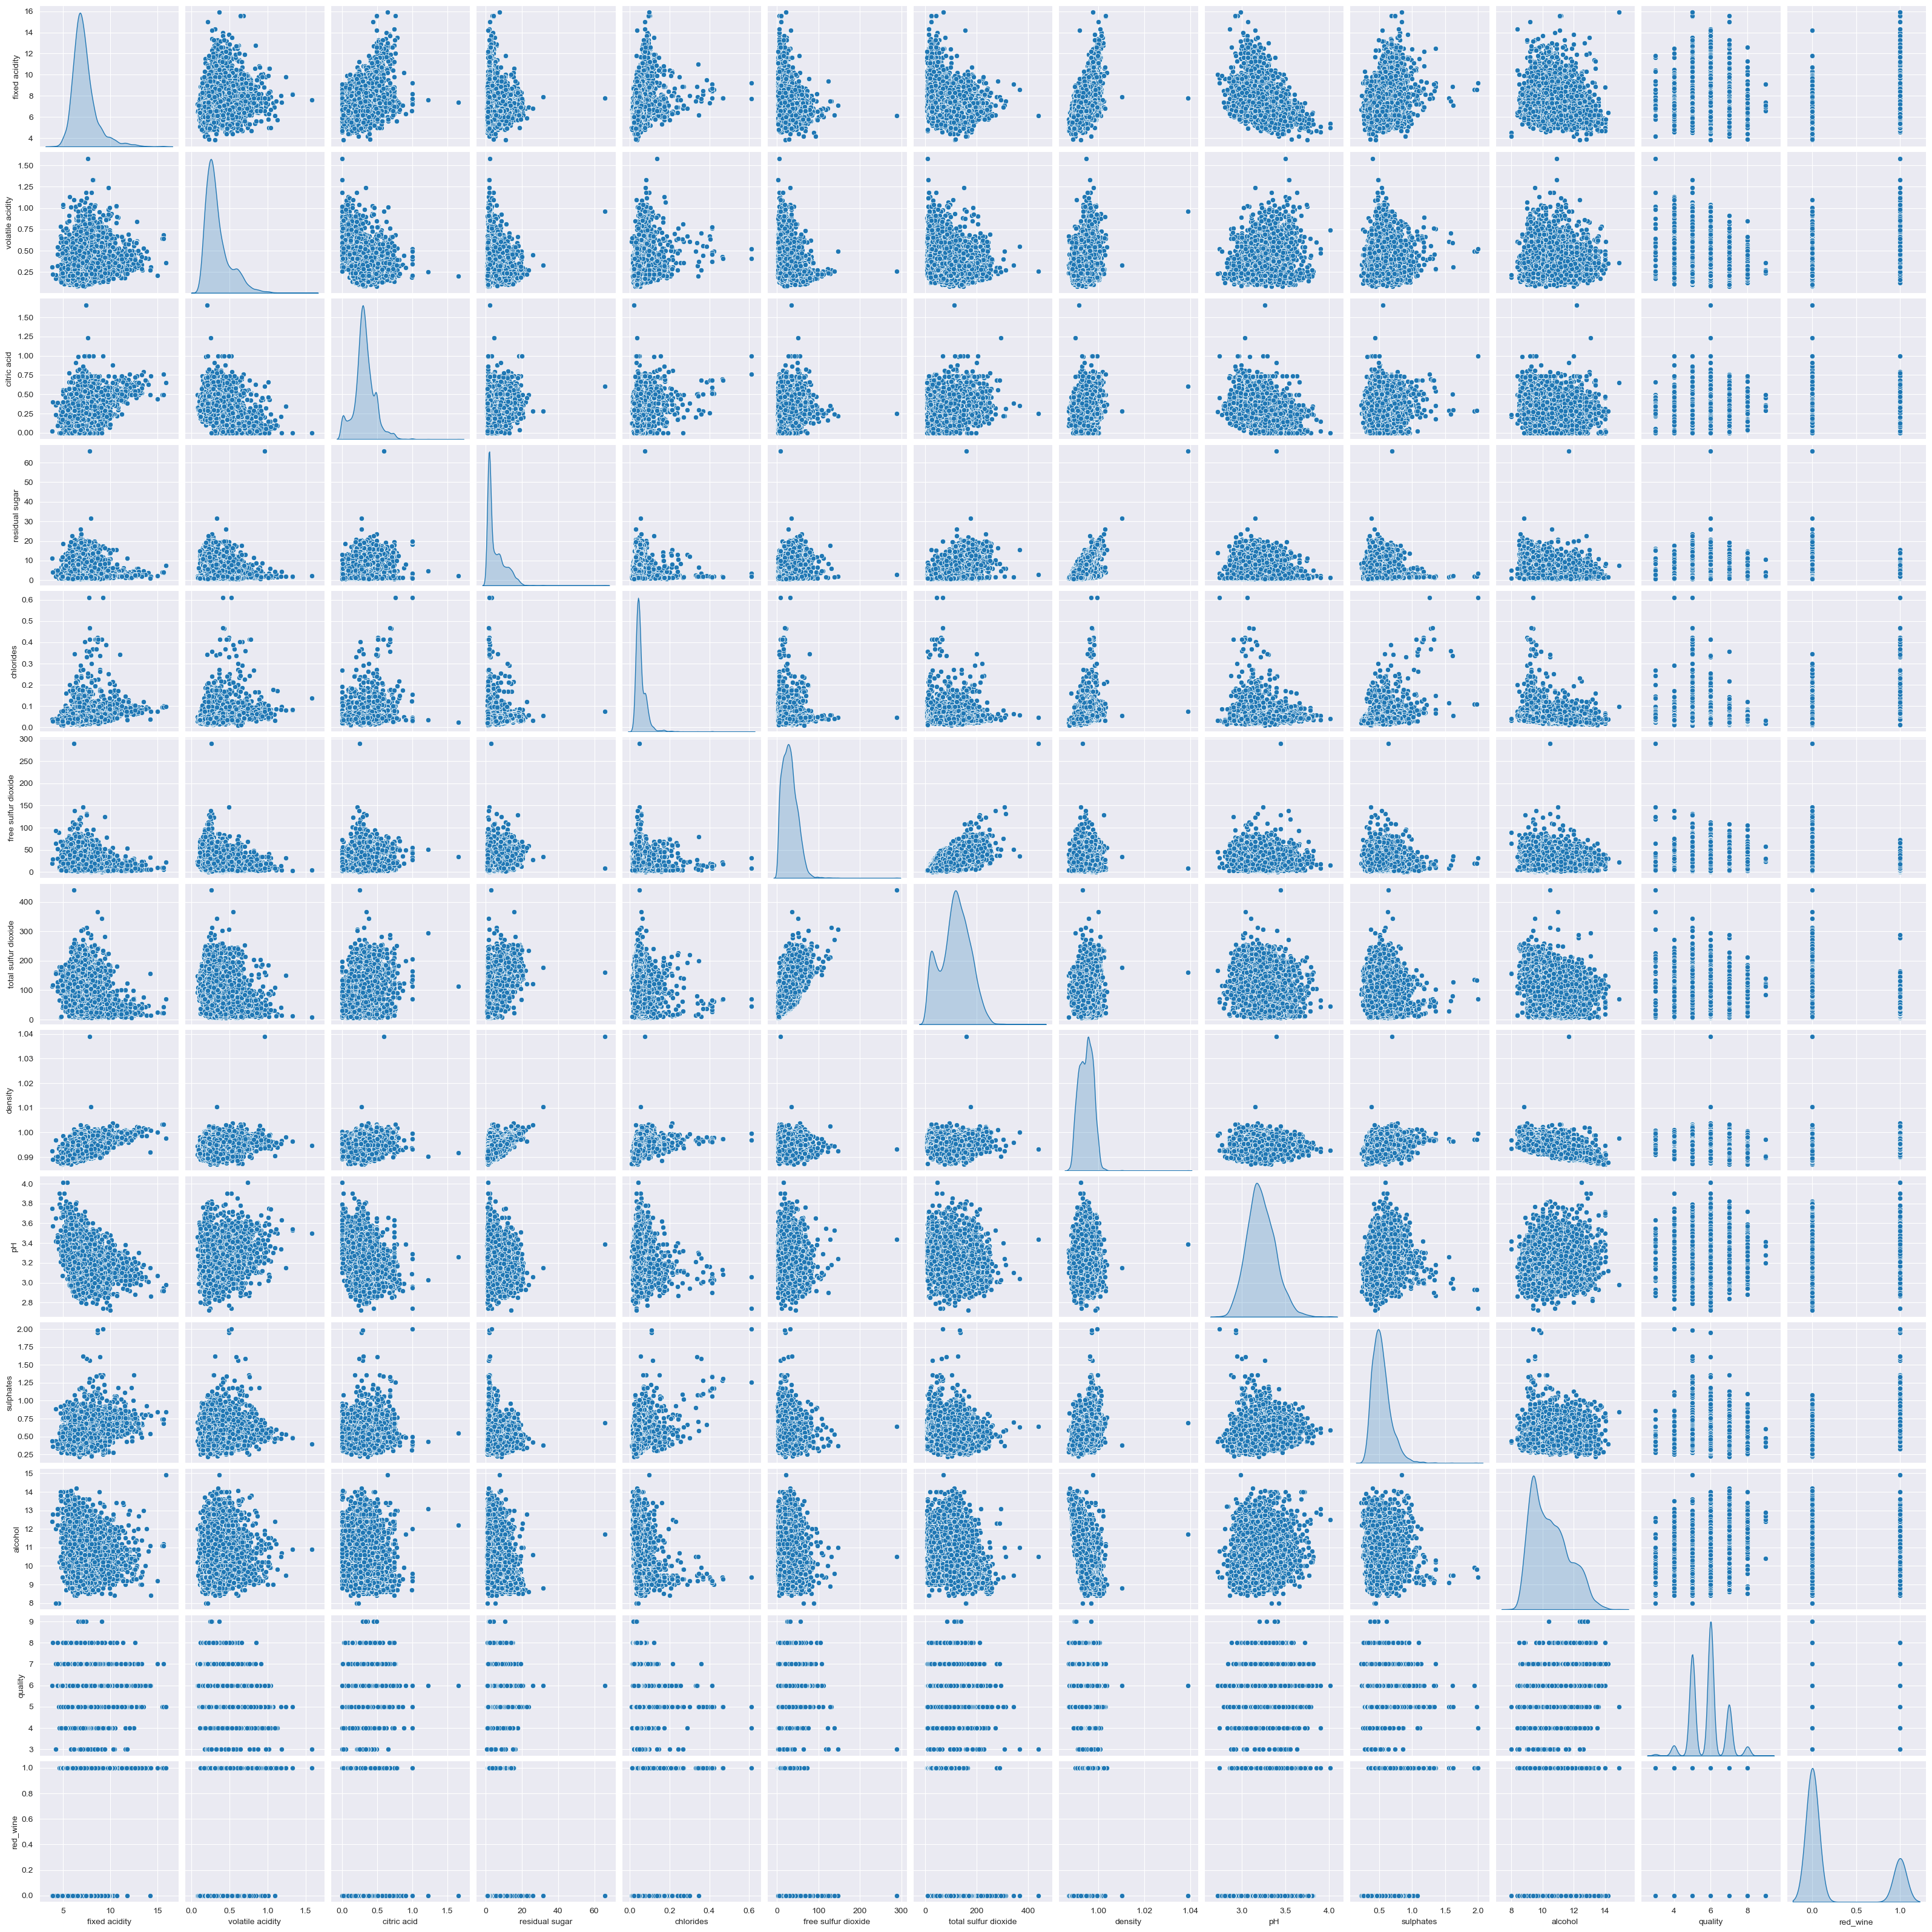

In [117]:
sns.pairplot(df, diag_kind='kde')
# gives us a pairplot, which provides kdeplots along the diagonal (default is histogram), and scatterplots betewen each combonation of columns. 

Looking at the pairplot above, we can see that there are a few columns that seem to have outliers. 

For data cleaning purposes, lets take a look at the columns `residual sugar`, `chlorides`, and `sulphates`. 

Note: This will be for analysis purposes only. The data does seem to be valid, therefore, none should be removed. I will make a copy to perform the analysis on. 

In [118]:
df_copy = df.copy(deep=True)
# creates a copy of the original dataframe. 
# deep=True makes it so that it is a deep copy. changes to the copy will not reflect in the original. 

In [119]:
def remove_outliers(data):
    """
    Creator: Daniel
    Inputs: data - column of data from dataframe
    Outputs: data with the outliers removed. 
    """
    q1 = np.quantile(data, 0.25) # 25th percentile
    q3 = np.quantile(data, 0.75) # 75th percentile

    iqr = q3 - q1 # Inter quartile range

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    return data[(data > lower_bound) & (data < upper_bound)]

In [120]:
def hist_box(data):
    """
    Creator: Daniel
    Inputs: data - column from dataframe
    outputs: histogram and boxplot of the data. Also adds vertical lines to histogram of the mean and median values. 
    """
    fig, ax = plt.subplots(2, 1, figsize=(10, 6))

    sns.histplot(x=data, kde=True, ax=ax[0])
    sns.boxplot(x=data, ax=ax[1])
    
    stat_info = data.agg(['mean', 'median', 'min', 'max'])
    mean = stat_info.loc['mean']
    median = stat_info.loc['median']
    print(stat_info)
    
    ax[0].axvline(mean, color='red', label='mean')
    ax[0].axvline(median, color='green', label='median')
    ax[0].legend()

#### Residual Sugar

mean       5.443235
median     3.000000
min        0.600000
max       65.800000
Name: residual sugar, dtype: float64


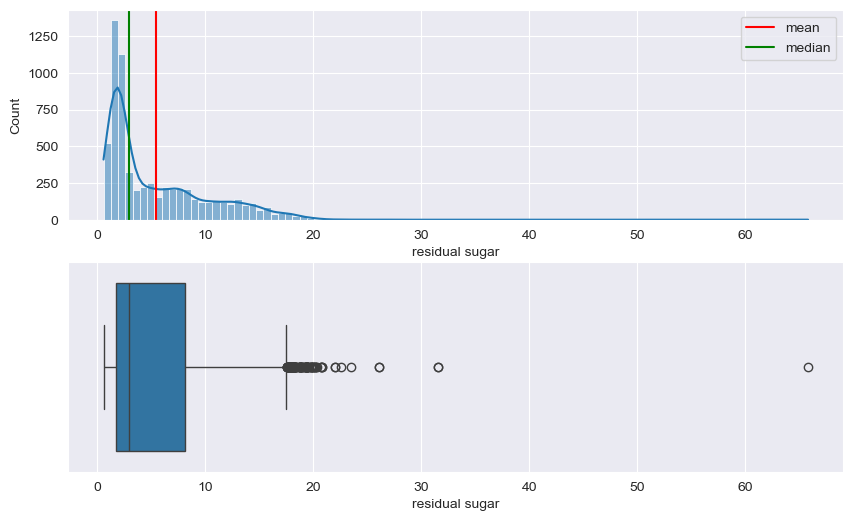

In [121]:
hist_box(df_copy['residual sugar'])

Due to the high outlier of 60 (among other lower, but still high outliers), the mean is very differnt from the median. Let's see what happens when we remove the outliers. 

In [122]:
res = remove_outliers(df['residual sugar'])

mean       5.183116
median     2.900000
min        0.600000
max       17.500000
Name: residual sugar, dtype: float64


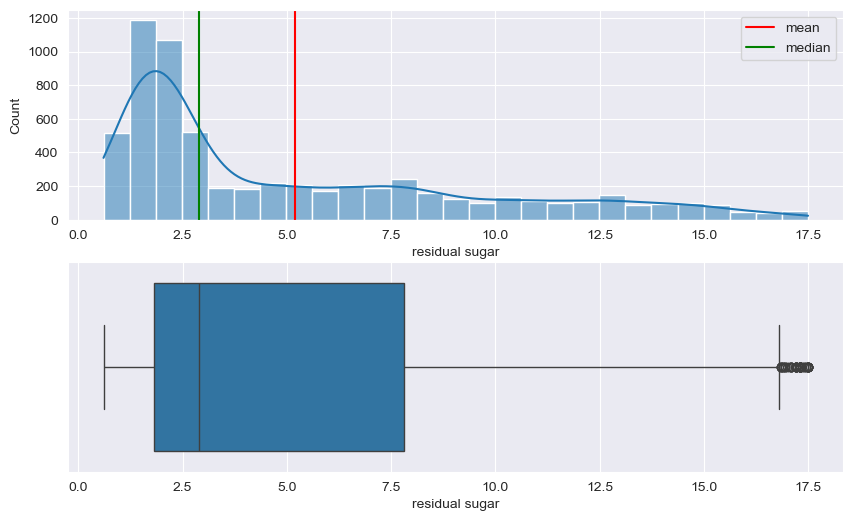

In [123]:
hist_box(res)

Even after removing the outliers, we can still see the difference between mean and median, but the range of our data is much smaller now. We can easily see now that the majority of the data is has under 10 residual sugar. 

#### Chlorides

mean      0.056034
median    0.047000
min       0.009000
max       0.611000
Name: chlorides, dtype: float64


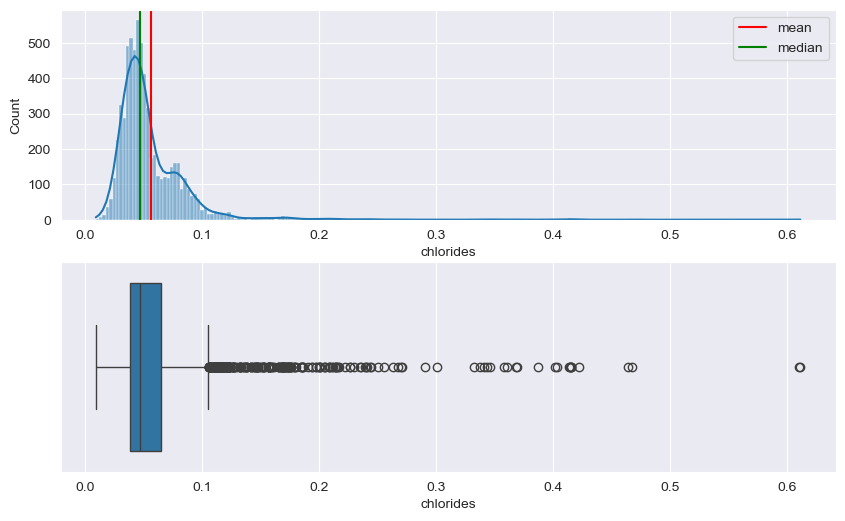

In [124]:
hist_box(df_copy['chlorides'])

In this column, there are many, many outliers, but the mean and the median are closer together. Let's remove the outliers and see how the view changes. 

In [125]:
chl = remove_outliers(df_copy['chlorides'])

mean      0.050823
median    0.046000
min       0.009000
max       0.105000
Name: chlorides, dtype: float64


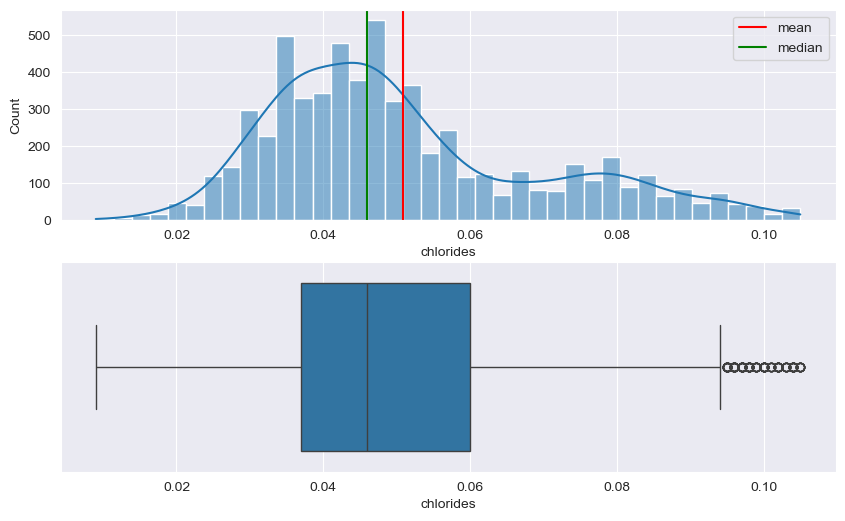

In [126]:
hist_box(chl)

After removing the outliers, we can see that the range has reduced from having a max of 0.6 to the max being a little over 0.1. This tells us the majority of the wines have less than 0.1 chlorides. After removing the outliers, the mean and median do not change that much, so despite having many outliers, they did not have much of an affect on them. 

#### Sulphates

mean      0.531268
median    0.510000
min       0.220000
max       2.000000
Name: sulphates, dtype: float64


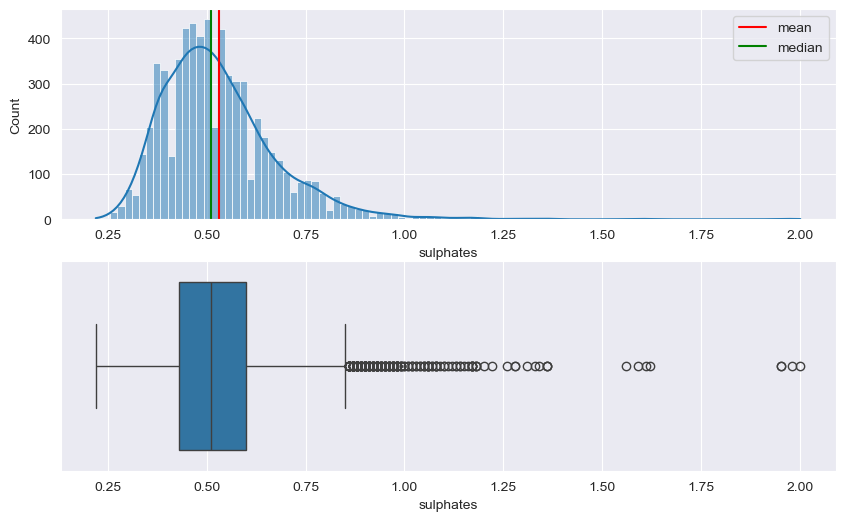

In [127]:
hist_box(df_copy['sulphates'])

Again, we see many outliers in the boxplot, and the mean and median are close together. Let's see if they are as robust as the mean and median in the `chlorides`. 

In [128]:
sul = remove_outliers(df_copy['sulphates'])

mean      0.516722
median    0.500000
min       0.220000
max       0.850000
Name: sulphates, dtype: float64


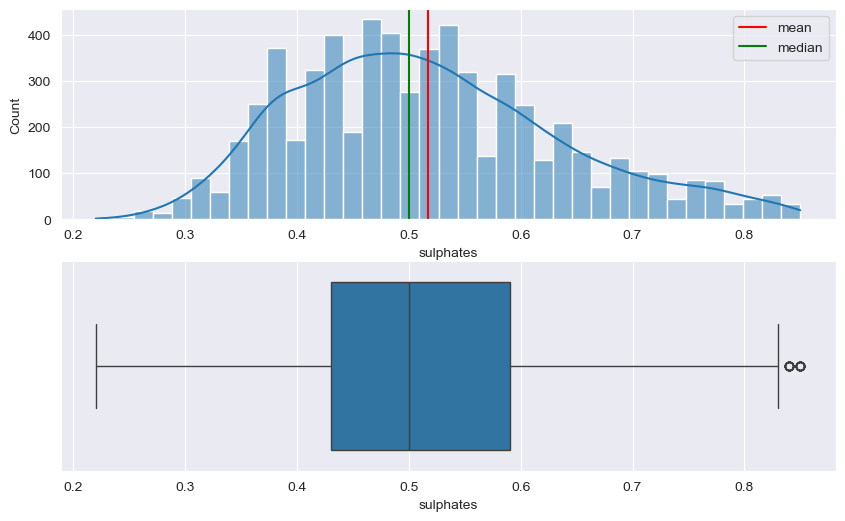

In [129]:
hist_box(sul)

After removing the outliers, the range changed from having a max of 2 to just below 1 (0.85). We see after removing outliers, the distibution is more normally distributed. This means the outliers might be considered anomloies, but we don't have any way to know for sure, so we will leave them in. The mean and median do see to be robust, in that they are not as affected by outliers than expected. 

## Exploratory Data Analysis

The purpose of this analysis is to classify between red and white wine. Let's make a new column, `wine`, that is a mapping of the `red_wine` column, which is binary

In [130]:
df['wine'] = df['red_wine'].map({1: 'red', 0: 'white'})
# creates a new column, wine, which says red and white, rather than 1s and 0s. 

<Axes: >

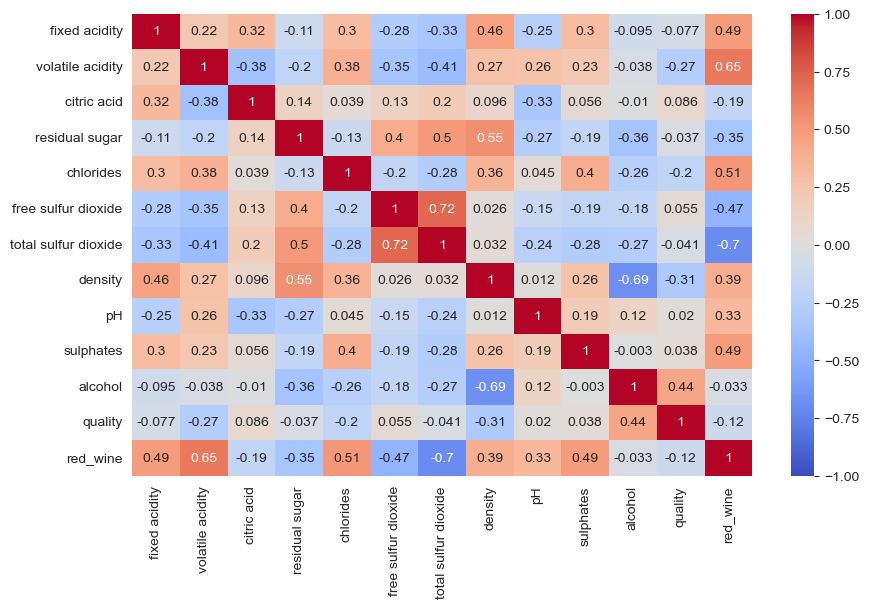

In [131]:

plt.figure(figsize=(10, 6))
sns.heatmap(data=df.corr(numeric_only=True),
           vmin=-1,
           vmax=1,
           cmap='coolwarm',
           annot=True)

Let's look at some different combnations of features in scatterplots, separated by wine. 

### Wine Type Counts

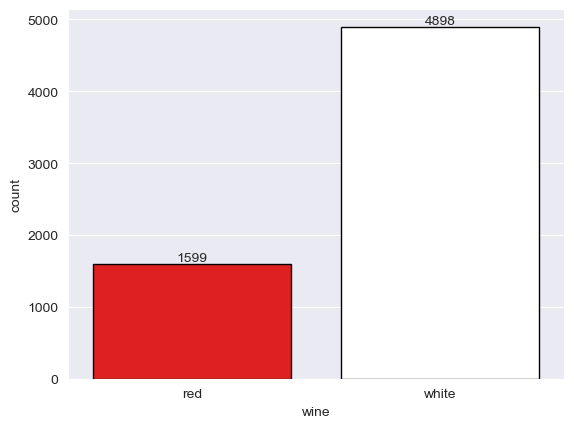

In [132]:
ax = sns.countplot(data=df, x='wine', hue=df['wine'], palette=['red' ,'white'], edgecolor='black')
for c in ax.containers:
    ax.bar_label(c)
plt.savefig('./images/wine_counts_bar.png')
# creates countplot  of the counts of ttypes of wine

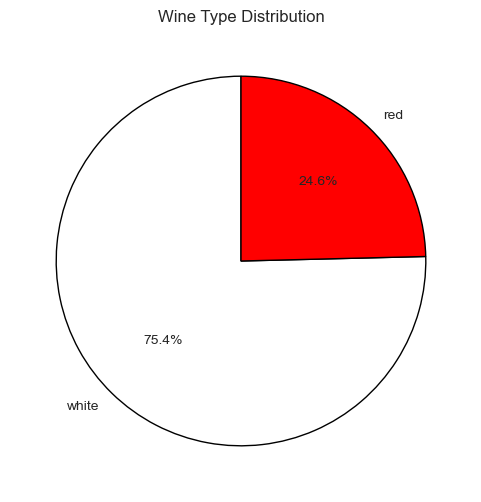

<Figure size 640x480 with 0 Axes>

In [133]:
counts = df['wine'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'},
    colors=['white', 'red']
)
plt.title("Wine Type Distribution")
plt.show()
plt.savefig('./images/wine_counts_pie.png')
# creates pieplot of the proportions of ttypes of wine

### Density vs Alcohol

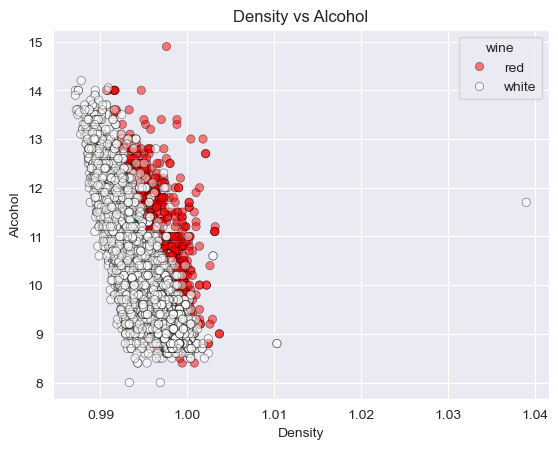

In [134]:
sns.scatterplot(data=df, x='density', y='alcohol', hue='wine', alpha=0.5, palette=['red', 'white'], edgecolor='black')
plt.title("Density vs Alcohol")
plt.xlabel("Density")
plt.ylabel("Alcohol");
plt.savefig('./images/density_alcohol.png')
# creates a scatterplot of the density vs the alcohol, separated by wine 

### Density vs Fixed Acidity

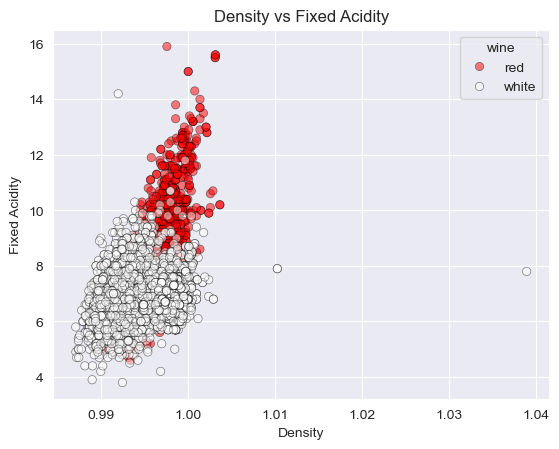

In [135]:
sns.scatterplot(data=df, x='density', y='fixed acidity', hue='wine', alpha=0.5, palette=['red', 'white'], edgecolor='black')
plt.title("Density vs Fixed Acidity")
plt.xlabel("Density")
plt.ylabel("Fixed Acidity");
plt.savefig('./images/density_fixed.png')
# creates a scatterplot of the density vs the fixed acidity, separated by wine 

### Volatile Acidity vs Citric Acid

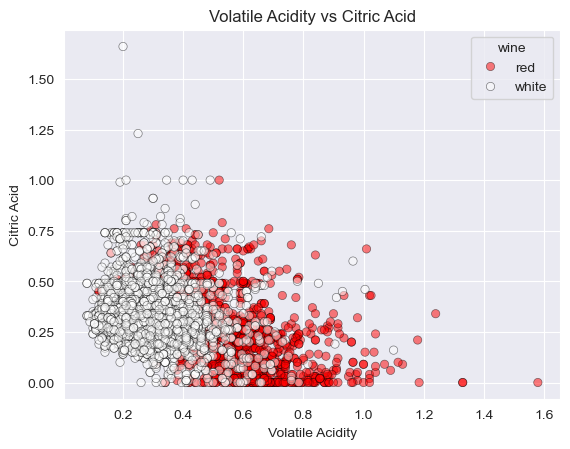

In [136]:
sns.scatterplot(data=df, x='volatile acidity', y='citric acid', hue='wine', alpha=0.5, palette=['red', 'white'], edgecolor='black')
plt.title("Volatile Acidity vs Citric Acid")
plt.xlabel("Volatile Acidity")
plt.ylabel("Citric Acid");
plt.savefig('./images/volatile_citric.png')
# creates a scatterplot of the volatile acidity vs the citric acid, separated by wine 

We can see clear areas of the different kinds of wine, telling us that K Nearest Neighbors may be a good option to determining wine type. 

Let's look more specifially at the correlation to wine types. 

<Axes: >

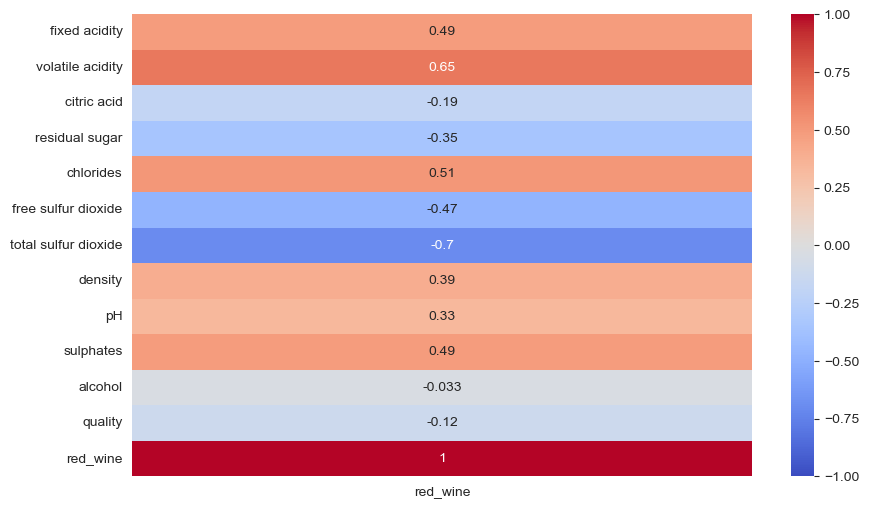

In [137]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=df.corr(numeric_only=True)[['red_wine']],
           vmin=-1,
           vmax=1,
           cmap='coolwarm',
           annot=True)

Looking at this heatmap, we see that most of the columns have high correlations to the type of wine (`red_wine` is binary, 1 for red, 0 for white)

It seems the columns that have the most correlation to the wines are: fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, ph, and sulphates

This makes sense, since quality will always vary among the different wines, and alcohol will be in wine regardless. However, I will admit that I do not know alot about wine, so I can't say with any confidence about how citric acid makes a difference, but the correlation is low. 

Let's make a basic KNN model with this (more modeling will be done in a different notebook)

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

In [139]:
X = df[['fixed acidity', 'volatile acidity', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
        'density', 'pH', 'sulphates']]
# independant variables
y = df['wine']
# target variable

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
# splits the data into training and testing data (75/25 split)

In [141]:
scaler = StandardScaler()
# scaler to scale numeric columns so the mean is 0 and std is 1

In [142]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# scales the independant varibales of both training and testing data

In [143]:
knn = KNeighborsClassifier(n_neighbors=5)
# instantiates the knn model

In [144]:
knn.fit(X_train_sc, y_train)
# fits the knn model

KNeighborsClassifier()

In [145]:
knn.score(X_test_sc, y_test)
# returns the accuracy score of the model

0.9932307692307693

We can see with just the 9 columns with the highest correlations, the model gets an accuracy score of 99%. 

Let's remove the columns we don't use and save the dataframe to use in another notebook.

In [146]:
cols = ['fixed acidity', 'volatile acidity', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
        'density', 'pH', 'sulphates',
       'wine']
# columns to keep for further analysis

In [147]:
df = df[cols]
# reassigns df to be a smaller version of itself, containing only the columns listed in cols 

In [148]:
df.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,wine
0,7.4,0.70,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,red
1,7.8,0.88,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,red
2,7.8,0.76,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,red
3,11.2,0.28,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,red
4,7.4,0.70,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,red


In [149]:
df.to_csv('./data/cleaned_wine.csv', index=False)
# creates a new csv file 

In [150]:
# for col in cols:
#     sns.scatterplot(data=df, x=col, y='volatile acidity', hue='wine', palette=['red', 'white'])
#     plt.show()